## Exploring Complex Surfaces with Parallel Tempering

Standard MCMC often gets stuck in "local minima." Parallel Tempering runs several chains at different "temperatures" (permitting them to explore low-probability regions) and swaps their states.

In [1]:
import numpy as np
from PyMCMC import FunctionFitter, ParallelTempering, MCMCAnalyzer
from models import multimodal_log_likelihood

fitter = FunctionFitter(custom_log_lik=multimodal_log_likelihood)

A standard sampler starting at $x=2$ will likely never find the peak at $x=8$.

In [2]:
# T_max=20 allows the hottest chain to jump between peaks easily
pt = ParallelTempering(fitter, n_temps=6, t_max=20.0)
cold_chain = pt.run(initial_params=[2.0], total_steps=20000, show_progress=True)

Parallel Tempering: 98.0% | Swaps: 777
Final Swaps accepted: 794, Swap Acceptance Rate: 79.40%


The trace plot will show the cold chain "jumping" between the two modes thanks to state swaps with hotter chains.

Automatic Burn-in detected: 50.0%


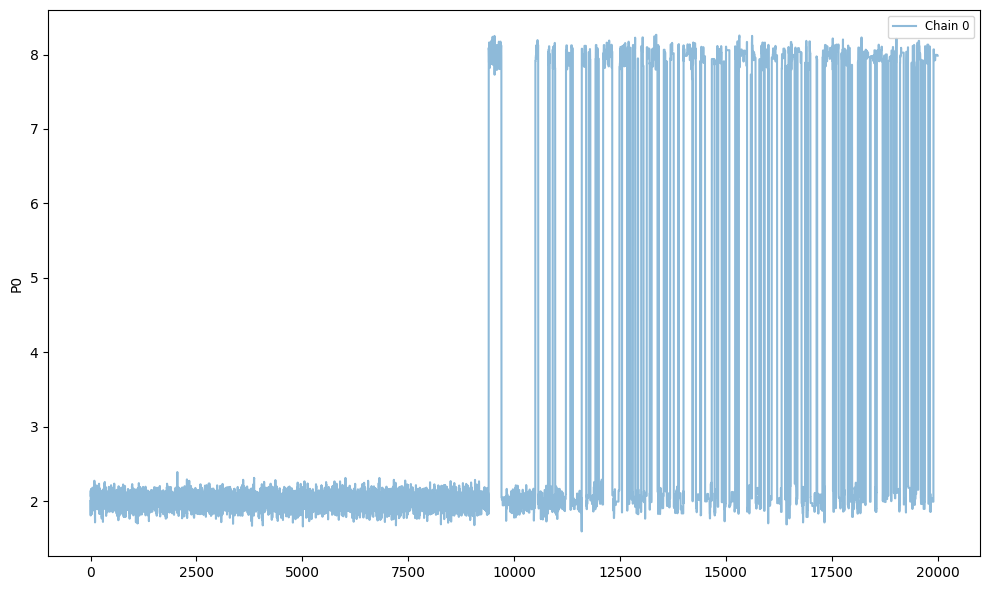

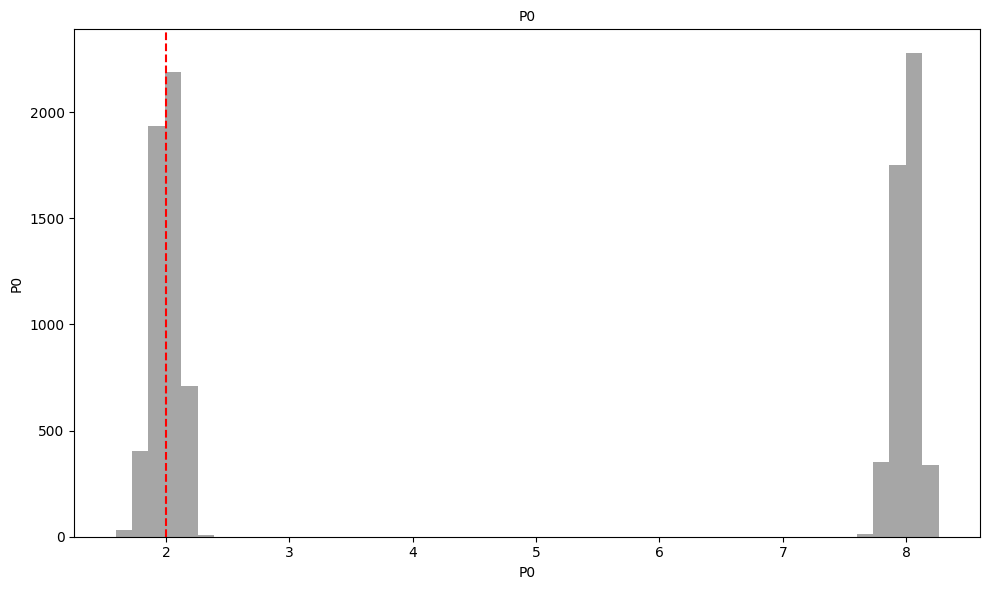

In [3]:
analyzer = MCMCAnalyzer(cold_chain, fitter=fitter)
analyzer.plot_traces()
analyzer.plot_corner(bins=50) # Should show two distinct towers